# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
#!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
#!unzip dogImages.zip

#!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip
#!unzip lfw.zip

In [2]:
!pip install opencv-python

In [3]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


In [4]:
import matplotlib.pyplot as plt                        
%matplotlib inline

### Show 5 Human Faces and Dogs

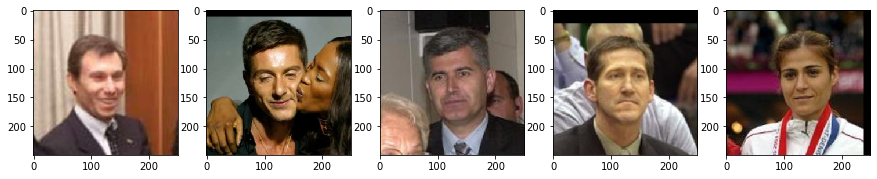

In [5]:
import cv2

fig, axs = plt.subplots(1, 5, figsize=(15,15))

for index, ax in enumerate(axs):
    img = cv2.imread(human_files[index])
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

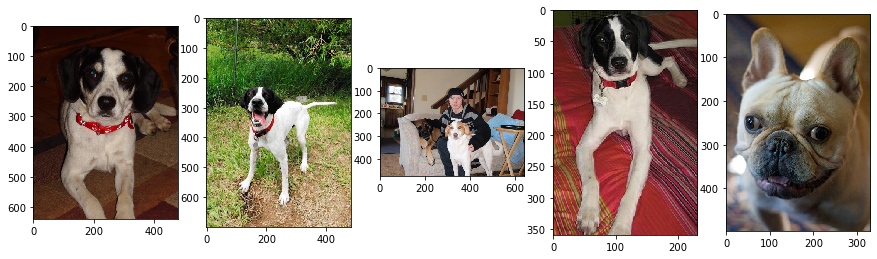

In [6]:
fig, axs = plt.subplots(1, 5, figsize=(15,15))

for index, ax in enumerate(axs):
    img = cv2.imread(dog_files[index])
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


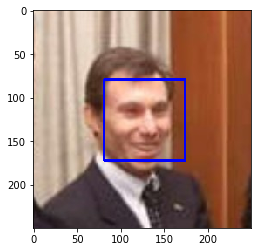

In [7]:
# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [8]:
# returns "True" if face is detected in image stored at img_path
def face_detector(classifier, img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = classifier.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [9]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

In [10]:
def test_detection(detection_func, human_files, dog_files):
    """ Applies the given detection function to the given files.
    
    Args:
        detection_func: A function to detect faces
        human_files: Array of file paths with human face images
        dog_files: Array of file paths with dog face images
        
    Returns:
        Accuracy of the detection
    """
    # run the detector over all images of humans and dogs
    human_faces_predictions = np.array([detection_func(path) for path in human_files])
    dog_predictions = np.array([detection_func(path) for path in dog_files])

    # divide number of true cases by the total of all images
    human_faces_accuracy = (human_faces_predictions == True).sum() / len(human_files)
    dog_accuracy = (dog_predictions == True).sum() / len(dog_files)
    
    return (human_faces_accuracy, dog_accuracy)

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [11]:
# other opencv face classifier
face_cascade_default = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
face_cascade_alt2 = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt2.xml')

In [12]:
%%time

human_result_alt, dog_result_alt = test_detection(lambda path: face_detector(face_cascade, path),
                                                  human_files_short,
                                                  dog_files_short)

CPU times: user 55.1 s, sys: 555 ms, total: 55.7 s
Wall time: 10.4 s


In [13]:
%%time

human_result_alt2, dog_result_alt2 = test_detection(lambda path: face_detector(face_cascade_alt2, path),
                                                    human_files_short,
                                                    dog_files_short)

CPU times: user 52.2 s, sys: 392 ms, total: 52.6 s
Wall time: 9.48 s


In [14]:
%%time

human_result_default, dog_result_default = test_detection(lambda path: face_detector(face_cascade_default, path),
                                                          human_files_short,
                                                          dog_files_short)

CPU times: user 50 s, sys: 397 ms, total: 50.4 s
Wall time: 9.39 s


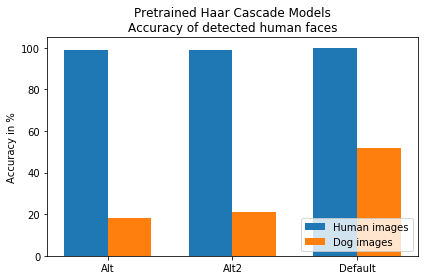

In [16]:
labels = ['Alt', 'Alt2', 'Default']
human_results = [r * 100 for r in [human_result_alt, human_result_alt2, human_result_default]]
dog_results = [r * 100 for r in [dog_result_alt, dog_result_alt2, dog_result_default]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, human_results, width, label='Human images')
rects2 = ax.bar(x + width/2, dog_results, width, label='Dog images')
ax.set_ylabel('Accuracy in %')
ax.set_title('Pretrained Haar Cascade Models\nAccuracy of detected human faces')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')

fig.tight_layout()
plt.show()

#### Comparison
The Algorithm `FrontalFaceAlt` has the best overall result of all 3 selected algorithms. `FrontalFaceDefault` has an Accuracy of almost 100% detecting human faces, but the error rate of this model is too big.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [17]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [18]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    # you will find the Normalize parameter in the PyTorch Docs
    transform = transforms.Compose([transforms.Resize(224), # 224 is the min size
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                         std=[0.229, 0.224, 0.225])])
    
    img = transform(Image.open(img_path))
    # For Tesnor, PyTorch expects another dimension
    img = img.unsqueeze(0)
    
    prediction = VGG16(img)
    # Get the index with the largest value
    index = prediction.data.numpy().argmax()
    
    return index

In [ ]:
%%time
predicted_index = VGG16_predict(dog_files[2])
print('The predicted index is:', predicted_index)
print('')

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [ ]:
dog_labels = {}

In [ ]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    """ This method returns if an image contains a dog or not
    
    Args:
        img_path: path to an image
        
    Returns:
        Boolean if a dog is detected
    """
    predicted_index = VGG16_predict(img_path)
    return True if(151 <= predicted_index <= 268) else False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [20]:
%%time
human_dog_detection_result, dog_detection_result = test_detection(dog_detector, human_files_short, dog_files_short)

CPU times: user 2min 37s, sys: 3.02 s, total: 2min 40s
Wall time: 40.2 s


In [21]:
print('VGG16')
print('-----')
print('Accuracy of detected human faces:', f'{human_dog_detection_result * 100}%')
print('Accuracy of detected human faces in dog images:', f'{dog_detection_result * 100}%')

VGG16
-----
Accuracy of detected human faces: 0.0%
Accuracy of detected human faces in dog images: 96.0%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [22]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [23]:
import os
from torchvision import datasets
from torch.utils.data import DataLoader

In [24]:
BATCH_SIZE = 20

In [25]:
train_transforms = transforms.Compose([transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomRotation(10),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                                            std=[0.229, 0.224, 0.225])])
train_dataset = datasets.ImageFolder('dogImages/train/', transform=train_transforms)
train_dataloader = DataLoader(train_dataset, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)

In [26]:
valid_test_transforms = transforms.Compose([transforms.Resize(256),
                                            transforms.CenterCrop(224),
                                            transforms.ToTensor(),
                                            transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                                                 std=[0.229, 0.224, 0.225])])

In [27]:
valid_dataset = datasets.ImageFolder('dogImages/valid/', transform=valid_test_transforms)
valid_dataloader = DataLoader(valid_dataset, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)

In [28]:
test_dataset = datasets.ImageFolder('dogImages/test/', transform=valid_test_transforms)
test_dataloader = DataLoader(test_dataset, 
                             batch_size=BATCH_SIZE, 
                             shuffle=True)

In [29]:
print('DataSet lengths')
print('---------------')
print('Train:', len(train_dataset))
print('Validation:', len(valid_dataset))
print('Train:', len(test_dataset))

DataSet lengths
---------------
Train: 6680
Validation: 835
Train: 836


In [30]:
train_samples = np.array(train_dataset.targets)
train_label_occurences = np.array([(train_samples == label).sum() for label in np.unique(train_samples)])

In [31]:
valid_samples = np.array(valid_dataset.targets)
valid_label_occurences = np.array([(valid_samples == label).sum() for label in np.unique(valid_samples)])

In [32]:
test_samples = np.array(test_dataset.targets)
test_label_occurences = np.array([(test_samples == label).sum() for label in np.unique(test_samples)])

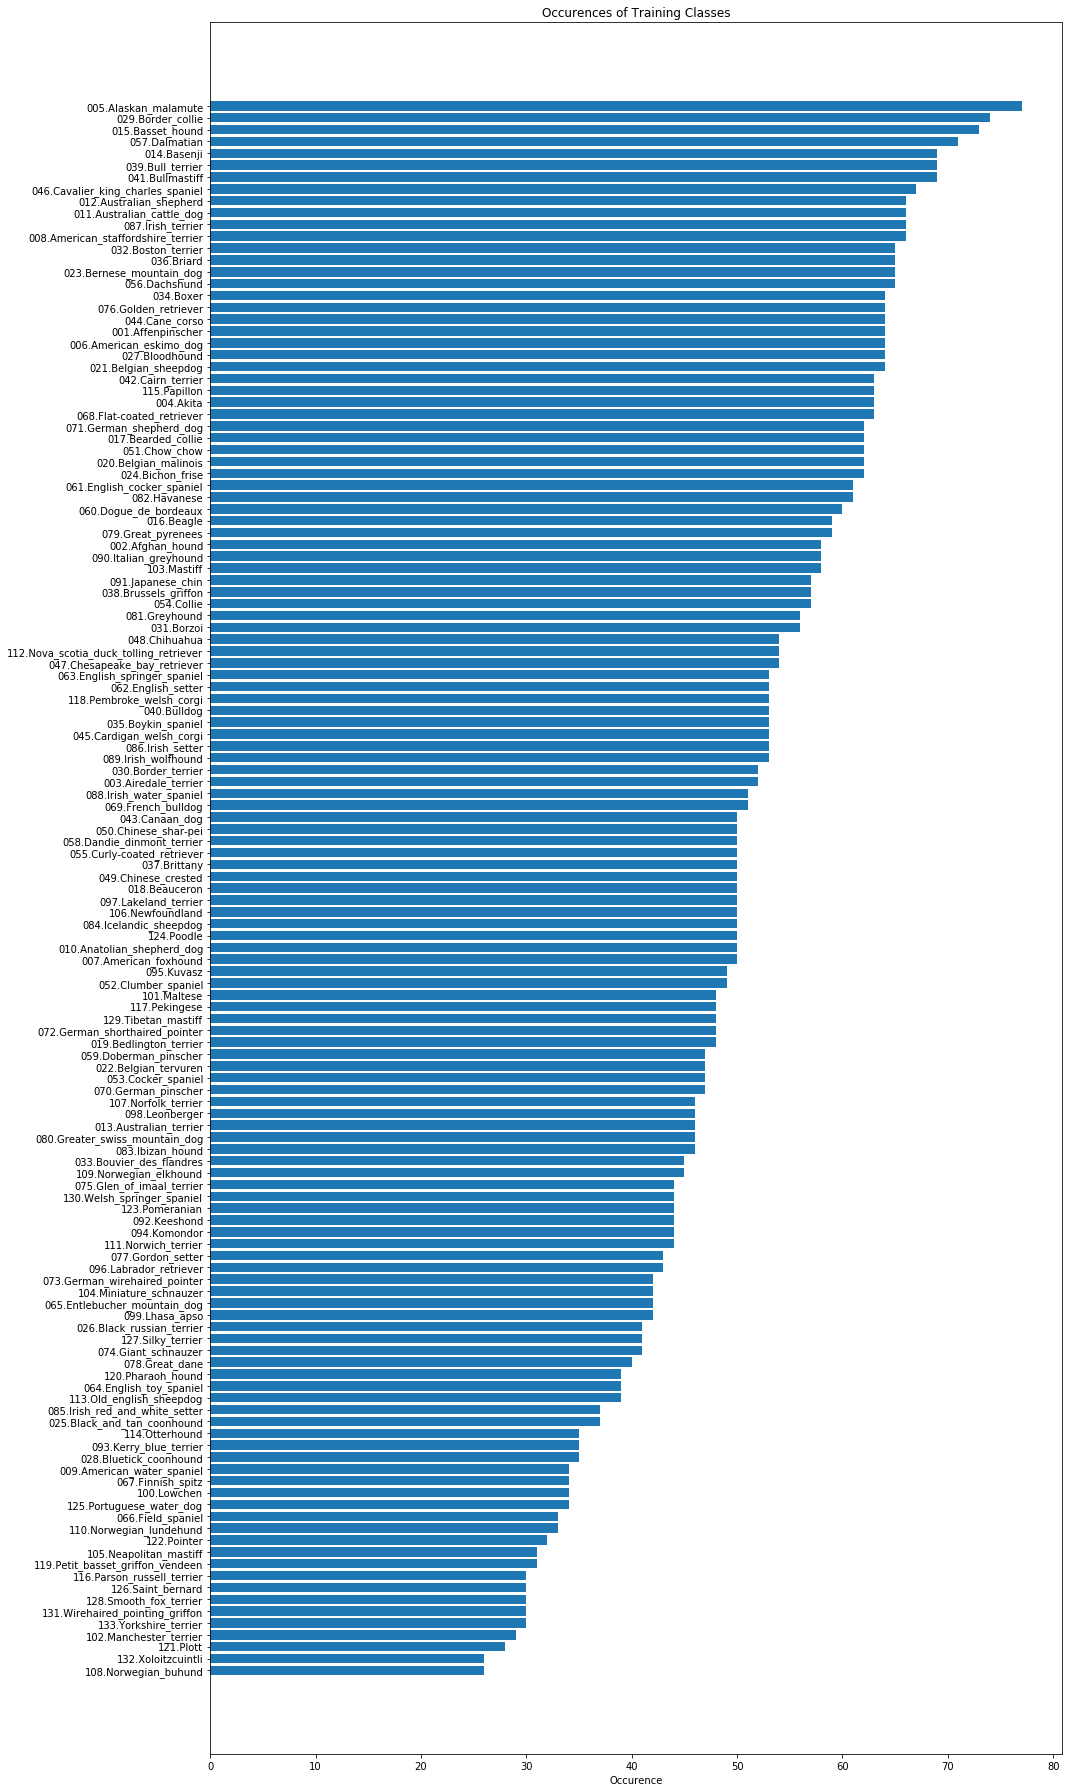

In [33]:
# Plot the occurences of dog breeds in the training dataset
train_index_sorted = np.argsort(train_label_occurences)

fig, ax1 = plt.subplots(1, 1, figsize=(15, 25))

plot_x = [train_dataset.classes[index] for index in train_index_sorted]
plot_y = [train_label_occurences[index] for index in train_index_sorted]
ax1.set_xlabel('Occurence')
ax1.set_title('Occurences of Training Classes')
ax1.barh(plot_x, plot_y)

plt.tight_layout()
plt.show()

In theory the classifier will probably produce a better result for dog breeds with a high occurence like alaskan malamute instead of dog breeds with a smaller occurence like the norwegian buhund.

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

I decided to resize the images first to 256x256 and then crop the center with a dimension of 224x224. Since we need the color to detect/classify the dog breed, i have not added any color changes (e.g. grey scalce or black/white) to the image. Therefore the input tensor has a size of 224x224x3. I decided to use a 224x224 dimension, because a bigger size would not make sense and will require too much memory. Another important fact is that a lot of pretrained models like VGG-16 and ResNet-50 accept 224x224. Because we will use these models in this expirement, it makes sense to use this dimension.

Augmentation is important, because it will increase the diversity of the test data, without adding new images and prevents overfitting. I decided to augment the images with a random horizontal flip and random rotation. Only horizontal flipping is activated, because dogs cant be upside down.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [34]:
n_classes = len(train_dataset.classes)
print('Number of train classes:', n_classes)

Number of train classes: 133


In [35]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # convolutional layers
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1, stride=2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1, stride=2)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # batch normalization for each convolutional layer
        self.conv_bn1 = nn.BatchNorm2d(32)
        self.conv_bn2 = nn.BatchNorm2d(64)
        self.conv_bn3 = nn.BatchNorm2d(128)
        
        # fully connected layer
        self.fc1 = nn.Linear(7*7*128, 512)
        self.fc2 = nn.Linear(512, n_classes)
    
    def forward(self, x):
        # layer 1
        x = F.relu(self.conv_bn1(self.conv1(x)))
        #x = F.relu(self.conv1(x))
        x = self.pool(x)
        
        # layer 2
        x = F.relu(self.conv_bn2(self.conv2(x)))
        #x = F.relu(self.conv2(x))
        x = self.pool(x)
        
        # layer 4
        x = F.relu(self.conv_bn3(self.conv3(x)))
        #x = F.relu(self.conv3(x))
        x = self.pool(x)
        
        #print('#'*10)
        #print(x[0].shape)
        #print('#'*10)
        
        # flatten
        x = x.view(-1, 7*7*128) # we get the 7 from the log above
        
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

* The CNN has three convolutional layers. The first two conv. layers have a stride of 2 to downsize the input by 2.
* The output of each conv. layer will be normalized by a batch normalization layer. After that the ReLU function is applied to the output.
* Each conv. layer is followed by a max. pooling layer to downsize the output by 2.
* A dropout layer is applied to prevent overfitting.
* At the end, two fully connected linear layers will produce the 133-dim (number of dog breed classed) output.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [36]:
import torch.optim as optim

criterion_scratch = nn.CrossEntropyLoss()

optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.01, momentum=0.9, nesterov=True)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [37]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model and the history of training metrics"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    # metrics history
    train_loss_hist = np.zeros(n_epochs+1).tolist()
    valid_loss_hist = np.zeros(n_epochs+1).tolist()
    valid_acc_hist = np.zeros(n_epochs+1).tolist()
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        valid_acc = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            # init with zero weights
            optimizer.zero_grad()
            output = model(data)
            # calculate loss with the loss function
            loss = criterion(output, target)
            # back propagation
            loss.backward()
            optimizer.step()
            
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        
        correct_pred = 0 
        total_classes = 0
        
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + (1 / (batch_idx + 1)) * (loss.data - valid_loss)
            
            # accuracy
            pred = torch.argmax(output, 1)
            accuracy = pred.eq(target).float().numpy()
            correct_pred = correct_pred + np.count_nonzero(accuracy == 1)
            total_classes = total_classes + len(target)
        
        # calculate validation accuracy
        valid_acc = correct_pred / total_classes
        
        # save metrics to the history
        train_loss_hist[epoch] = train_loss
        valid_loss_hist[epoch] = valid_loss
        valid_acc_hist[epoch] = valid_acc
        
        # print training/validation statistics 
        print('Epoch: {},  Training Loss: {:.6f},  Validation Loss: {:.6f},  Valid. Accuracy:  {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss,
            valid_acc
            ))
        
        # save the model if validation loss has decreased
        if(valid_loss < valid_loss_min):
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model, train_loss_hist, valid_loss_hist, valid_acc_hist

In [45]:
loaders_scratch = {'train': train_dataloader, 'valid': valid_dataloader, 'test': test_dataloader}

if(os.path.exists('model_scratch.pt')):
    print('Model does exist, load model_scratch.pt')
    # load the model that got the best validation accuracy
    model_scratch.load_state_dict(torch.load('model_scratch.pt'))
else:
    print('Model does not exist. Need to train a new one ...\n\n')
    # train the model
    model_scratch, train_loss, valid_loss, valid_acc = train(40, loaders_scratch, model_scratch, 
                                                             optimizer_scratch,criterion_scratch, 
                                                             use_cuda, 'model_scratch.pt')

Model does exist, load model_scratch.pt


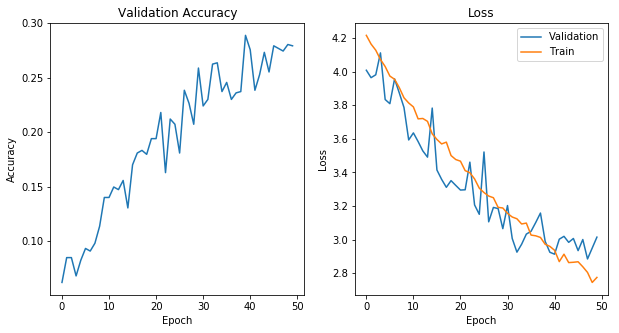

In [109]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

# val accuracy
axs[0].set_title('Validation Accuracy')
axs[0].plot(valid_acc[1:])
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')

# loss
axs[1].set_title('Loss')
axs[1].plot(valid_loss[1:])
axs[1].plot(train_loss[1:])
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Validation', 'Train'], loc='upper right')

fig.show()

__Explanation__

We can see that after the 40th epoch there is no improvement in the validation accuracy. Therefore we can say, that 40 epochs are enough to train our model.

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [46]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.
    
    y_test = []
    y_pred = []

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
        
        # add all results
        for y in target.cpu().numpy():
            y_test.append(y)
        for y in pred.cpu().numpy().flatten():
            y_pred.append(y)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))
    
    return np.array(y_test), np.array(y_pred)

# call test function    
y_test_scratch, y_pred_scratch = test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.960380


Test Accuracy: 27% (226/836)


In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test_scratch, y_pred_scratch, target_names=test_dataset.classes))

                                        precision    recall  f1-score   support

                     001.Affenpinscher       0.23      0.62      0.33         8
                      002.Afghan_hound       0.15      0.25      0.19         8
                  003.Airedale_terrier       0.00      0.00      0.00         6
                             004.Akita       0.10      0.12      0.11         8
                  005.Alaskan_malamute       0.33      0.40      0.36        10
               006.American_eskimo_dog       0.21      0.62      0.31         8
                 007.American_foxhound       0.00      0.00      0.00         7
    008.American_staffordshire_terrier       1.00      0.12      0.22         8
            009.American_water_spaniel       0.50      0.25      0.33         4
            010.Anatolian_shepherd_dog       0.00      0.00      0.00         6
             011.Australian_cattle_dog       0.50      0.11      0.18         9
               012.Australian_shepherd 

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


__Explanation__

In this classification report we can see the details for the classification of each dog breed class. The accuracy of 27% is good enough for the requirements of this project. Nevertheless 27% is not a good accuracy for a classification model and therefore we will use a pretrained model for the transfer-learning part.

The model has problems to detect some dog breeds, e.g. portuguese water dog, yorkshire terrier and approximately 29 more. All of these classes have a precision, recall and f1-score value of 0. Those are probably classes with a low occurence in the train dataset.

In [48]:
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_dataset.classes]

In [49]:
def predict_breed(img_path, model, class_names, use_cuda=use_cuda):
    """ The methods predicts the breed with the given trained model.
    It returns the name of the breed.
    
    Args:
        img_path: path to an image
        model: Trained classifier model
        class_names: All available class names (The breeds the model has been trained with)
        use_cuda: Boolean 
        
    Returns:
        String of the dog breed
    """
    # load the image and return the predicted breed
    img = Image.open(img_path).convert('RGB')
    transform = transforms.Compose([transforms.Resize(256),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                                        std=[0.229, 0.224, 0.225])])
    
    transformed_image = transform(img).unsqueeze(0)
    if(use_cuda):
        transformed_image.cuda()
        
    model.eval()
    # make the predictions
    prediction = model(transformed_image)
    prediction = prediction.cpu()
    # get the label
    index = prediction.data.numpy().argmax()
    
    return class_names[index]

In [59]:
# three images of dogs classes with bad performance metrics
bad_perf_images = [
    'dogImages/valid/133.Yorkshire_terrier/Yorkshire_terrier_08333.jpg',
    'dogImages/valid/128.Smooth_fox_terrier/Smooth_fox_terrier_08127.jpg',
    'dogImages/valid/125.Portuguese_water_dog/Portuguese_water_dog_08002.jpg'
]
for path in bad_perf_images:
    label = path.split('/')[-1][:-10].replace('_', ' ')
    prediction = predict_breed(path, model_scratch, class_names)
    print(f'True: {label},  Prediction: {prediction}')

True: Yorkshire terrier,  Prediction: Otterhound
True: Smooth fox terrier,  Prediction: Parson russell terrier
True: Portuguese water dog,  Prediction: Black russian terrier


__Explanation__

Here we can see that the classifier was not able to classifiy three dog breeds correct. All of those three dog breeds are classes with a precision, recall and f1-score value of 0.

---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [60]:
loaders_transfer = loaders_scratch

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [61]:
import torchvision.models as models
import torch.nn as nn

model_transfer = models.resnet50(pretrained=True)

for param in model_transfer.parameters():
    param.requires_grad = False

model_transfer.fc = nn.Linear(model_transfer.fc.in_features, n_classes)

if use_cuda:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/ec2-user/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:08<00:00, 12.4MB/s]


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 


I have decided to use a pretrained model, in particular the ResNet-50 model for transfer learning. Since the scratch model from Step 3 has a very low accuracy, it makes sense to use a pretrained model. The ResNet-50 model is trained with 152 layers on the ImageNet dataset and has won the 1st price on the ILSVRC 2015 classification task. Therefore, the ResNet-50 is the best fit for our dog breed image classification case.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [62]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [66]:
n_epochs = 30

if(os.path.exists('model_transfer.pt')):
    print('Model does exist, load model_transfer.pt')
    # load the model that got the best validation accuracy
    model_transfer.load_state_dict(torch.load('model_transfer.pt'))
else:
    print('Model does not exist. Need to train a new one ...\n\n')
    # train the model
    model_transfer, train_loss_transfer, valid_loss_transfer, valid_acc_transfer = train(n_epochs, 
                                                                                         loaders_transfer, 
                                                                                         model_transfer, 
                                                                                         optimizer_transfer, 
                                                                                         criterion_transfer, 
                                                                                         use_cuda, 
                                                                                         'model_transfer.pt')

Model does exist, load model_transfer.pt


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [67]:
y_test_transfer, y_pred_transfer = test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.024121


Test Accuracy: 81% (681/836)


In [68]:
print(classification_report(y_test_transfer, y_pred_transfer, target_names=test_dataset.classes))

                                        precision    recall  f1-score   support

                     001.Affenpinscher       1.00      1.00      1.00         8
                      002.Afghan_hound       0.89      1.00      0.94         8
                  003.Airedale_terrier       0.75      1.00      0.86         6
                             004.Akita       1.00      0.62      0.77         8
                  005.Alaskan_malamute       0.77      1.00      0.87        10
               006.American_eskimo_dog       1.00      1.00      1.00         8
                 007.American_foxhound       1.00      0.57      0.73         7
    008.American_staffordshire_terrier       1.00      1.00      1.00         8
            009.American_water_spaniel       1.00      0.25      0.40         4
            010.Anatolian_shepherd_dog       0.83      0.83      0.83         6
             011.Australian_cattle_dog       0.86      0.67      0.75         9
               012.Australian_shepherd 

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


__Explanation__

An accuracy of 81% is a way better result. Also we dont have an dog breed class with a precision, recall or f1-score value of 0. Therefore, this model delivers good predictions.

### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

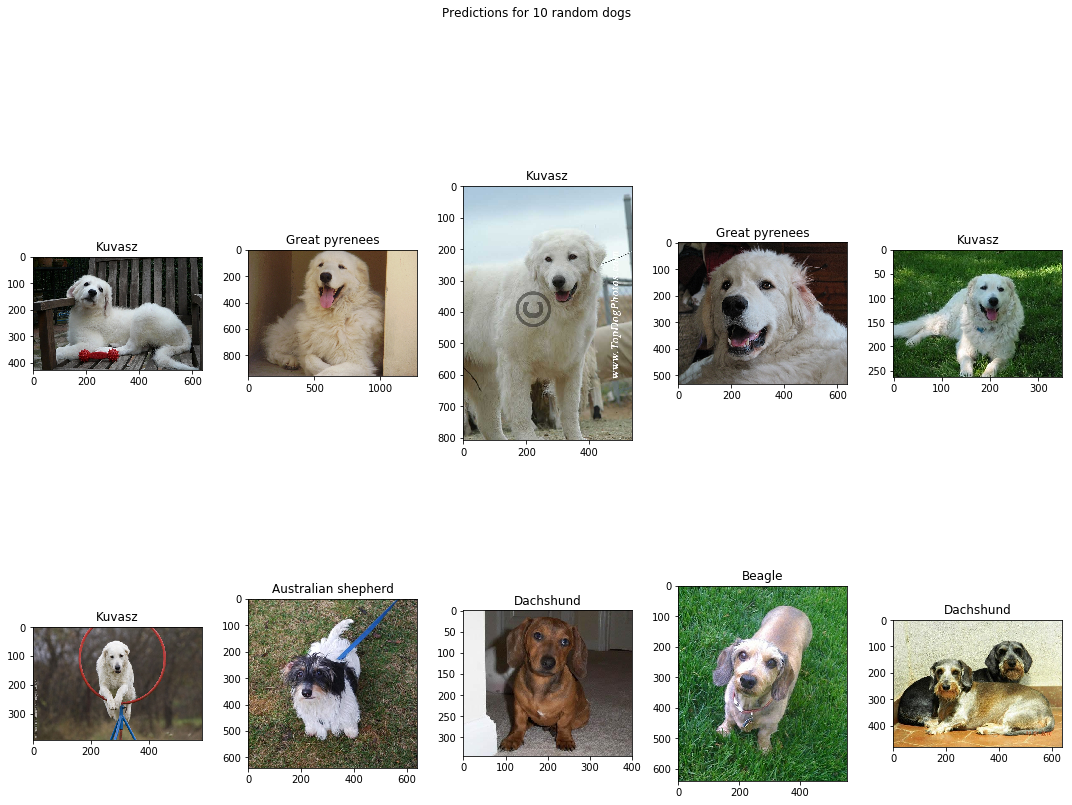

In [50]:
valid_dog_files = np.array(glob("dogImages/valid/*/*"))
random_valid_dogs = np.random.choice(valid_dog_files, 10)

fig, axs = plt.subplots(2, 5, figsize=(15,15))
fig.suptitle('Predictions for 10 random dogs')
for index, ax in enumerate(axs.flatten()):
    path = valid_dog_files[index]
    img = cv2.imread(path)
    # we will use tha same function from above
    ax.set_title(predict_breed(path, model_transfer, class_names))
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [69]:
def run_app(img_path):
    """ The run_app methods determines whether the the image contains a human, a dog, or neither.
    According to that it will print out a custom text and show the image.
    If a dog or a human is detected, the method tries to predict the according dog breed.
    
    Args:
        img_path: path to an image
        
    Returns:
        Prints a custom text and the image
    """
    img = Image.open(img_path)
    
    is_human = False
    pred = ''
    
    if(dog_detector(img_path)):
        # this is a dog
        pred = predict_breed(img_path, model_transfer, class_names)
        print('What a sweet dog!')
    elif(face_detector(face_cascade, img_path)):
        # this is a human
        is_human = True
        pred = predict_breed(img_path, model_transfer, class_names)
        print('You may be a human, but you really look like a ...')
    else:
        # this is odd
        print('This cannot be, this is neither a dog nor a human')
        
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    
    if(is_human):
        pred = f'... {pred}'
    print(pred)

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

In [83]:
#!unzip personalValidImages.zip

You may be a human, but you really look like a ...


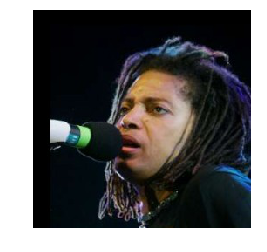

... Chinese crested



You may be a human, but you really look like a ...


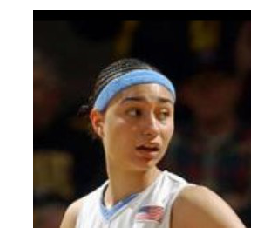

... Pharaoh hound



You may be a human, but you really look like a ...


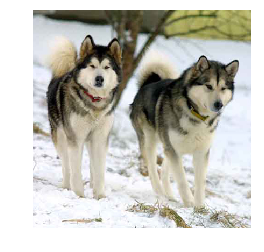

... Alaskan malamute



What a sweet dog!


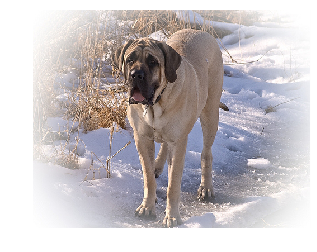

Mastiff



What a sweet dog!


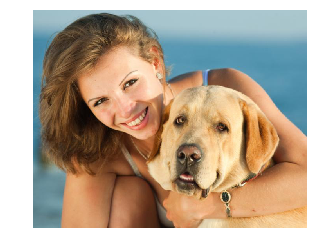

Labrador retriever



You may be a human, but you really look like a ...


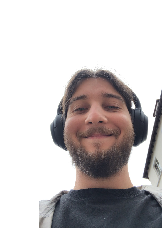

... Bulldog



What a sweet dog!


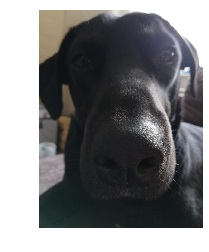

Great dane



What a sweet dog!


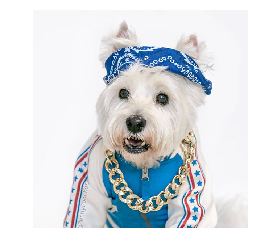

Havanese



What a sweet dog!


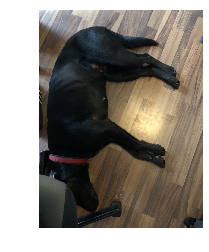

Italian greyhound



What a sweet dog!


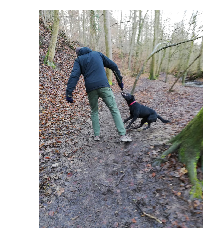

Curly-coated retriever



This cannot be, this is neither a dog nor a human


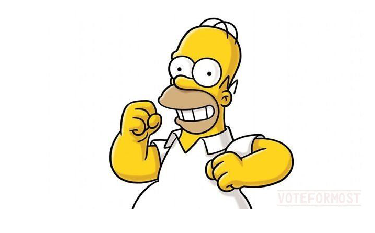





What a sweet dog!


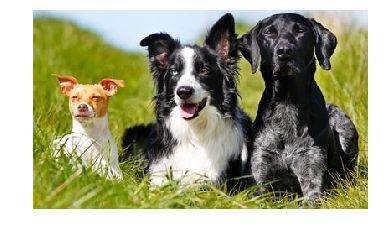

Border collie





In [70]:
random_human_files = np.random.choice(human_files, 2)
random_dog_files = np.random.choice(dog_files, 2)
other_files = np.array(glob('personalValidImages/*'))
random_files = np.concatenate([random_human_files, random_dog_files, other_files], axis=0)

for file in random_files:
    run_app(file)
    print('\n\n')

### Points for improvement
In general the result is good. Dogs get detected accordingly to their breed and we have a breed for humans. It is not really possible to be sure that the detected dog breed for a human is a good detection.

* **Pictures of human with dogs:** In my test case only the dog gets detected and printed out. It would be better if the algorithm can detect that we have a human with a dog in this image
* **Multiple dogs:** The algorithm can only detect one dog at a time. The option to detect all dogs and print them would be a better solution.
* **Hyper-Parameter tuning** could improve the perfomance of the classifier